In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn.externals
import joblib
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.experimental import enable_halving_search_cv

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data set and headers into a pandas dataframe

dataset= pd.read_csv("SG_used_car.csv", index_col=False)

# Exploratory Data Analysis

In [3]:
# print the shape of the dataset

print(dataset.shape)

(3987, 20)


In [4]:
# print the info of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    3987 non-null   int64  
 1   LISTING_URL                   3987 non-null   object 
 2   BRAND                         3987 non-null   object 
 3   PRICE                         3962 non-null   float64
 4   DEPRE_VALUE_PER_YEAR          3876 non-null   float64
 5   REG_DATE                      3987 non-null   object 
 6   MILEAGE_KM                    3338 non-null   float64
 7   MANUFACTURED_YEAR             3987 non-null   object 
 8   ROAD_TAX_PER_YEAR             3833 non-null   float64
 9   TRANSMISSION                  3987 non-null   object 
 10  DEREG_VALUE_FROM_SCRAPE_DATE  3221 non-null   float64
 11  SCRAPE_DATE                   3987 non-null   object 
 12  OMV                           3963 non-null   float64
 13  ARF

In [5]:
dataset.keys()

Index(['Unnamed: 0', 'LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR',
       'REG_DATE', 'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR',
       'TRANSMISSION', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV',
       'ARF', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

#### There are some null values in the datast, this will need to be addressed during the cleaning stage

In [6]:
# print the first 5 row of the dataset

dataset.head()

,Unnamed: 0,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
0,0,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,58800.0,5880.0,24-Oct-2009,81000.0,2008,978.0,Auto,NaN,23/10/2019,28040.0,28040.0,NaN,0.0,1799,1219.0,1.0,Mid-Sized Sedan
1,1,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,62800.0,6270.0,10-Nov-2009,106087.0,2009,1628.0,Auto,NaN,23/10/2019,33532.0,33532.0,NaN,0.0,2354,1680.0,3.0,MPV
2,2,https://www.sgcarmart.com/used_cars/info.php?I...,Austin,30000.0,16950.0,28-Sep-1972,NaN,1972,NaN,Manual,834.0,23/10/2019,NaN,NaN,4711.0,642.0,998,NaN,NaN,Others
3,3,https://www.sgcarmart.com/used_cars/info.php?I...,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,23/10/2019,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV
4,4,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23/10/2019,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV


In [7]:
# print the description of the dataset

dataset.describe()

,Unnamed: 0,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS
count,3987.00000,3962.000000,3876.000000,3338.000000,3833.000000,3221.000000,3963.000000,3957.000000,3236.000000,3963.000000,3987.000000,3859.000000,3925.000000
mean,1993.00000,83201.312973,11407.925697,71870.671061,1161.109053,50947.490531,33822.094625,35356.628506,48309.075711,1943.007822,1886.066466,1432.756154,1.807643
std,1151.09209,73444.057027,9294.521774,44779.839099,897.455742,34418.521219,34394.898529,43257.325396,17093.072453,1002.474719,666.258555,257.023124,1.089259
min,0.00000,1190.000000,1730.000000,3.000000,50.000000,34.000000,1800.000000,1316.000000,2989.000000,0.000000,647.000000,795.000000,1.000000
25%,996.50000,46350.000000,7387.500000,37204.000000,684.000000,34674.000000,18131.500000,14570.000000,37502.000000,1465.000000,1498.000000,1249.000000,1.000000
50%,1993.00000,67800.000000,9230.000000,65000.000000,750.000000,45855.000000,25050.000000,22642.000000,49998.000000,2070.000000,1598.000000,1395.000000,1.000000
75%,2989.50000,93800.000000,12690.000000,105000.000000,1210.000000,59055.000000,36973.000000,39195.000000,57498.000000,2679.000000,1997.000000,1602.500000,2.000000
max,3986.00000,938000.000000,131070.000000,330000.000000,11550.000000,423396.000000,487275.000000,536003.000000,97889.000000,3563.000000,6749.000000,2745.000000,6.000000


# Data Cleaning

In [8]:
# make a copy of the dataset

data = dataset.copy()

# delete the rows with empty values

data.dropna(inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 3 to 3985
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2584 non-null   int64  
 1   LISTING_URL                   2584 non-null   object 
 2   BRAND                         2584 non-null   object 
 3   PRICE                         2584 non-null   float64
 4   DEPRE_VALUE_PER_YEAR          2584 non-null   float64
 5   REG_DATE                      2584 non-null   object 
 6   MILEAGE_KM                    2584 non-null   float64
 7   MANUFACTURED_YEAR             2584 non-null   object 
 8   ROAD_TAX_PER_YEAR             2584 non-null   float64
 9   TRANSMISSION                  2584 non-null   object 
 10  DEREG_VALUE_FROM_SCRAPE_DATE  2584 non-null   float64
 11  SCRAPE_DATE                   2584 non-null   object 
 12  OMV                           2584 non-null   float64
 13  ARF

In [9]:
# Convert the 'reg_date' and 'SCRAPE_DATA' columns to datetime format to get car age in years based on time the data was scrapped

data['REG_DATE'] = pd.to_datetime(data['REG_DATE'], format='%d-%b-%Y')
data['SCRAPE_DATE'] = pd.to_datetime(data['SCRAPE_DATE'], format='%d/%m/%Y')

# Create a new column to store the number of years between the two dates
data['CAR_AGE_YEARS'] = round((data['SCRAPE_DATE'] - data['REG_DATE']).dt.days / 365, 2)

# Print the updated DataFrame
print(data)

      Unnamed: 0                                        LISTING_URL  \
3              3  https://www.sgcarmart.com/used_cars/info.php?I...   
4              4  https://www.sgcarmart.com/used_cars/info.php?I...   
5              5  https://www.sgcarmart.com/used_cars/info.php?I...   
7              7  https://www.sgcarmart.com/used_cars/info.php?I...   
9              9  https://www.sgcarmart.com/used_cars/info.php?I...   
...          ...                                                ...   
3981        3981  https://www.sgcarmart.com/used_cars/info.php?I...   
3982        3982  https://www.sgcarmart.com/used_cars/info.php?I...   
3983        3983  https://www.sgcarmart.com/used_cars/info.php?I...   
3984        3984  https://www.sgcarmart.com/used_cars/info.php?I...   
3985        3985  https://www.sgcarmart.com/used_cars/info.php?I...   

              BRAND     PRICE  DEPRE_VALUE_PER_YEAR   REG_DATE  MILEAGE_KM  \
3              Audi   70800.0               16580.0 2011-12-05    140

In [10]:
# delete the 2 columns 

del data['Unnamed: 0']
del data['LISTING_URL']
del data['REG_DATE']
del data['SCRAPE_DATE']

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 3 to 3985
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         2584 non-null   object 
 1   PRICE                         2584 non-null   float64
 2   DEPRE_VALUE_PER_YEAR          2584 non-null   float64
 3   MILEAGE_KM                    2584 non-null   float64
 4   MANUFACTURED_YEAR             2584 non-null   object 
 5   ROAD_TAX_PER_YEAR             2584 non-null   float64
 6   TRANSMISSION                  2584 non-null   object 
 7   DEREG_VALUE_FROM_SCRAPE_DATE  2584 non-null   float64
 8   OMV                           2584 non-null   float64
 9   ARF                           2584 non-null   float64
 10  COE_FROM_SCRAPE_DATE          2584 non-null   float64
 11  DAYS_OF_COE_LEFT              2584 non-null   float64
 12  ENGINE_CAPACITY_CC            2584 non-null   int64  
 13  CUR

In [11]:
# print the sample of the cleaned data

data.sample(5)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,CAR_AGE_YEARS
3732,Toyota,93800.0,11480.0,48000.0,2015,1196.0,Auto,59858.0,37388.0,39344.0,47000.0,2344.0,1986,1610.0,1.0,SUV,3.55
2668,Kia,75800.0,7250.0,6900.0,2018,738.0,Auto,40861.0,11829.0,11829.0,33199.0,3502.0,1591,1287.0,1.0,Mid-Sized Sedan,0.37
668,Toyota,48800.0,13550.0,91250.0,2011,1638.0,Auto,36892.0,38940.0,38940.0,62502.0,768.0,2362,1770.0,2.0,MPV,7.84
360,Hyundai,64500.0,7320.0,44000.0,2017,738.0,Auto,43566.0,12577.0,12577.0,42902.0,2587.0,1591,1345.0,1.0,Mid-Sized Sedan,2.05
994,Volkswagen,28800.0,9580.0,121000.0,2011,620.0,Auto,23106.0,24357.0,24357.0,55989.0,609.0,1390,1417.0,3.0,Mid-Sized Sedan,8.27


In [12]:
data.keys()

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'CAR_AGE_YEARS'],
      dtype='object')

In [13]:
data.describe()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,CAR_AGE_YEARS
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,92442.819272,12770.305728,64502.158282,1155.412926,53730.590170,34751.988777,37006.611068,49992.115325,2196.682276,1881.769350,1446.806502,1.570820,4.800213
std,77491.457150,10462.140400,42034.963816,889.314902,35010.161277,36169.097440,46182.599180,16215.045599,815.311996,670.018065,252.064686,0.962527,3.175201
min,9800.000000,3950.000000,6.000000,50.000000,6653.000000,6510.000000,1316.000000,8501.000000,0.000000,658.000000,810.000000,1.000000,0.050000
25%,57300.000000,8360.000000,33634.000000,684.000000,38170.500000,18693.500000,14719.250000,40000.000000,1701.750000,1497.000000,1275.000000,1.000000,2.520000
50%,72800.000000,10435.000000,57000.000000,742.000000,47876.000000,25647.000000,23706.500000,50951.000000,2317.000000,1598.000000,1425.000000,1.000000,3.740000
75%,104800.000000,13972.500000,89000.000000,1210.000000,60993.500000,36995.500000,40801.750000,58192.750000,2767.000000,1998.000000,1610.000000,2.000000,6.822500
max,938000.000000,131070.000000,313778.000000,11550.000000,423396.000000,487275.000000,536003.000000,97889.000000,3563.000000,6749.000000,2730.000000,6.000000,15.130000


In [14]:
# Counting the values in the Transmission column

data['TRANSMISSION'].value_counts()

Auto      2547
Manual      37
Name: TRANSMISSION, dtype: int64

In [15]:
# Counting the values in the Vehicles Type column

data['VEHICLE_TYPE'].value_counts()

Luxury Sedan       557
SUV                555
Mid-Sized Sedan    497
Hatchback          389
MPV                278
Sports Car         261
Stationwagon        47
Name: VEHICLE_TYPE, dtype: int64

In [16]:
# Counting the values in the Brand column

data['BRAND'].value_counts()

Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Nissan           127
Audi             127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Jaguar            22
Citroen           22
Chevrolet         19
Renault           19
Maserati          18
Land              16
Ford              14
Infiniti          14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               4
Skoda              3
Jeep               3
Rolls-Royce        2
Aston              1
Ssangyong          1
Hummer             1
Proton             1
Alfa               1
Lotus              1
Fiat               1
Daihatsu           1
Name: BRAND, dtype: int64

# Feature Engineering

In [17]:
data_no_brands = data[['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE_YEARS', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
data_no_brands.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE_YEARS,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
3,70800.0,16580.0,140800.0,75889.0,761.0,7.89,58899.0,71379.0,71379.0,2995,2380.0,2250.0,3.0,SUV,Auto
4,65800.0,6850.0,117000.0,39563.0,3503.0,10.33,38024.0,23465.0,23465.0,1797,974.0,1350.0,2.0,MPV,Auto
5,45000.0,18550.0,126000.0,41006.0,8.0,9.09,31818.0,56154.0,56154.0,1796,974.0,1650.0,4.0,Luxury Sedan,Auto
7,70800.0,12680.0,41000.0,78810.0,1610.0,5.50,54685.0,32459.0,27443.0,1598,742.0,1405.0,2.0,Luxury Sedan,Auto
9,89500.0,11910.0,57784.0,61103.0,2221.0,3.91,62640.0,29913.0,33879.0,1395,624.0,1480.0,2.0,SUV,Auto


In [18]:
# Replacing categorical datas with one-hot encoded data

features_data = pd.get_dummies(data_no_brands, columns=['TRANSMISSION','VEHICLE_TYPE'])

In [19]:
# print the info after the one-hot encoding of the columns

features_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 3 to 3985
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRICE                         2584 non-null   float64
 1   DEPRE_VALUE_PER_YEAR          2584 non-null   float64
 2   MILEAGE_KM                    2584 non-null   float64
 3   COE_FROM_SCRAPE_DATE          2584 non-null   float64
 4   DAYS_OF_COE_LEFT              2584 non-null   float64
 5   CAR_AGE_YEARS                 2584 non-null   float64
 6   DEREG_VALUE_FROM_SCRAPE_DATE  2584 non-null   float64
 7   OMV                           2584 non-null   float64
 8   ARF                           2584 non-null   float64
 9   ENGINE_CAPACITY_CC            2584 non-null   int64  
 10  ROAD_TAX_PER_YEAR             2584 non-null   float64
 11  CURB_WEIGHT_KG                2584 non-null   float64
 12  NO_OF_OWNERS                  2584 non-null   float64
 13  TRA

In [20]:
# print 10 sample rows of the dataframe

features_data.sample(10)

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE_YEARS,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,...,NO_OF_OWNERS,TRANSMISSION_Auto,TRANSMISSION_Manual,VEHICLE_TYPE_Hatchback,VEHICLE_TYPE_Luxury Sedan,VEHICLE_TYPE_MPV,VEHICLE_TYPE_Mid-Sized Sedan,VEHICLE_TYPE_SUV,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Stationwagon
2445,63800.0,7590.0,18000.0,36001.0,2561.0,2.09,34121.0,17527.0,7527.0,1197,...,1.0,1,0,1,0,0,0,0,0,0
309,104800.0,14560.0,56000.0,58109.0,1827.0,4.16,63550.0,37468.0,39456.0,1595,...,1.0,1,0,0,1,0,0,0,0,0
3180,55800.0,13260.0,110000.0,77291.0,1164.0,6.81,42158.0,31873.0,26873.0,1595,...,1.0,1,0,0,1,0,0,0,0,0
983,66800.0,9280.0,43000.0,55200.0,2438.0,3.28,43741.0,18858.0,8858.0,1496,...,3.0,1,0,0,0,1,0,0,0,0
3753,69800.0,11700.0,57000.0,74403.0,1492.0,5.08,53679.0,30212.0,24297.0,1598,...,3.0,1,0,0,1,0,0,0,0,0
3807,63000.0,7890.0,50000.0,51106.0,2774.0,2.34,42927.0,19298.0,5000.0,999,...,1.0,1,0,1,0,0,0,0,0,0
1291,125000.0,16000.0,88500.0,47000.0,2341.0,3.53,62468.0,36216.0,42703.0,2493,...,2.0,1,0,0,0,1,0,0,0,0
1322,199800.0,23920.0,51000.0,38610.0,2371.0,3.47,90463.0,63877.0,86979.0,1984,...,1.0,1,0,0,0,0,0,1,0,0
563,89800.0,8980.0,47000.0,38000.0,3103.0,1.49,52310.0,24716.0,26603.0,999,...,1.0,1,0,0,1,0,0,0,0,0
3646,75800.0,11100.0,64000.0,66590.0,2095.0,4.22,55960.0,25919.0,23287.0,1595,...,2.0,1,0,1,0,0,0,0,0,0


In [21]:
features_data.describe()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE_YEARS,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,...,NO_OF_OWNERS,TRANSMISSION_Auto,TRANSMISSION_Manual,VEHICLE_TYPE_Hatchback,VEHICLE_TYPE_Luxury Sedan,VEHICLE_TYPE_MPV,VEHICLE_TYPE_Mid-Sized Sedan,VEHICLE_TYPE_SUV,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Stationwagon
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,...,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,92442.819272,12770.305728,64502.158282,49992.115325,2196.682276,4.800213,53730.590170,34751.988777,37006.611068,1881.769350,...,1.570820,0.985681,0.014319,0.150542,0.215557,0.107585,0.192337,0.214783,0.101006,0.018189
std,77491.457150,10462.140400,42034.963816,16215.045599,815.311996,3.175201,35010.161277,36169.097440,46182.599180,670.018065,...,0.962527,0.118825,0.118825,0.357671,0.411288,0.309916,0.394213,0.410751,0.301395,0.133660
min,9800.000000,3950.000000,6.000000,8501.000000,0.000000,0.050000,6653.000000,6510.000000,1316.000000,658.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57300.000000,8360.000000,33634.000000,40000.000000,1701.750000,2.520000,38170.500000,18693.500000,14719.250000,1497.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72800.000000,10435.000000,57000.000000,50951.000000,2317.000000,3.740000,47876.000000,25647.000000,23706.500000,1598.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,104800.000000,13972.500000,89000.000000,58192.750000,2767.000000,6.822500,60993.500000,36995.500000,40801.750000,1998.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,938000.000000,131070.000000,313778.000000,97889.000000,3563.000000,15.130000,423396.000000,487275.000000,536003.000000,6749.000000,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
features_data.keys()

Index(['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE_YEARS', 'DEREG_VALUE_FROM_SCRAPE_DATE',
       'OMV', 'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION_Auto',
       'TRANSMISSION_Manual', 'VEHICLE_TYPE_Hatchback',
       'VEHICLE_TYPE_Luxury Sedan', 'VEHICLE_TYPE_MPV',
       'VEHICLE_TYPE_Mid-Sized Sedan', 'VEHICLE_TYPE_SUV',
       'VEHICLE_TYPE_Sports Car', 'VEHICLE_TYPE_Stationwagon'],
      dtype='object')

In [23]:
# Corr Matrix
features_data.corr(numeric_only=True)

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE_YEARS,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,...,NO_OF_OWNERS,TRANSMISSION_Auto,TRANSMISSION_Manual,VEHICLE_TYPE_Hatchback,VEHICLE_TYPE_Luxury Sedan,VEHICLE_TYPE_MPV,VEHICLE_TYPE_Mid-Sized Sedan,VEHICLE_TYPE_SUV,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Stationwagon
PRICE,1.000000,0.816275,-0.409517,0.182914,0.273379,-0.322249,0.924820,0.801592,0.879241,0.630484,...,-0.090614,0.054688,-0.054688,-0.154398,0.101226,-0.090217,-0.246442,0.085048,0.351093,-0.015342
DEPRE_VALUE_PER_YEAR,0.816275,1.000000,-0.174560,0.332787,-0.133003,-0.038719,0.789711,0.906446,0.879452,0.718868,...,0.100187,0.042391,-0.042391,-0.144960,0.102981,-0.081964,-0.224823,0.001076,0.418294,-0.022374
MILEAGE_KM,-0.409517,-0.174560,1.000000,-0.084824,-0.554330,0.820353,-0.405090,-0.113452,-0.135532,-0.007598,...,0.541356,-0.141413,0.141413,-0.028085,0.055327,0.161504,0.081421,-0.203811,-0.023675,-0.029990
COE_FROM_SCRAPE_DATE,0.182914,0.332787,-0.084824,1.000000,-0.287075,-0.177781,0.413598,0.290350,0.250242,0.290806,...,-0.151817,0.118870,-0.118870,-0.089434,0.242422,-0.002123,-0.282408,0.010390,0.140383,-0.017275
DAYS_OF_COE_LEFT,0.273379,-0.133003,-0.554330,-0.287075,1.000000,-0.564328,0.177268,-0.075169,-0.034700,-0.110199,...,-0.306966,0.045058,-0.045058,0.011818,-0.101568,0.003999,-0.042434,0.162688,-0.055569,0.022140
CAR_AGE_YEARS,-0.322249,-0.038719,0.820353,-0.177781,-0.564328,1.000000,-0.370966,0.060214,0.017692,0.155763,...,0.668261,-0.199428,0.199428,-0.023247,-0.008858,0.127017,0.091095,-0.246500,0.136617,-0.024265
DEREG_VALUE_FROM_SCRAPE_DATE,0.924820,0.789711,-0.405090,0.413598,0.177268,-0.370966,1.000000,0.767793,0.852555,0.615779,...,-0.169197,0.093327,-0.093327,-0.169617,0.156222,-0.084815,-0.261221,0.084963,0.307804,-0.014902
OMV,0.801592,0.906446,-0.113452,0.290350,-0.075169,0.060214,0.767793,1.000000,0.962446,0.789314,...,0.203444,0.034570,-0.034570,-0.159780,0.133315,-0.079600,-0.237586,-0.030930,0.452030,-0.021612
ARF,0.879241,0.879452,-0.135532,0.250242,-0.034700,0.017692,0.852555,0.962446,1.000000,0.794265,...,0.153008,0.033770,-0.033770,-0.187217,0.140390,-0.079321,-0.225435,-0.015249,0.439406,-0.026170
ENGINE_CAPACITY_CC,0.630484,0.718868,-0.007598,0.290806,-0.110199,0.155763,0.615779,0.789314,0.794265,1.000000,...,0.250047,0.015320,-0.015320,-0.270148,0.112110,0.039951,-0.228412,0.001830,0.435374,-0.028394


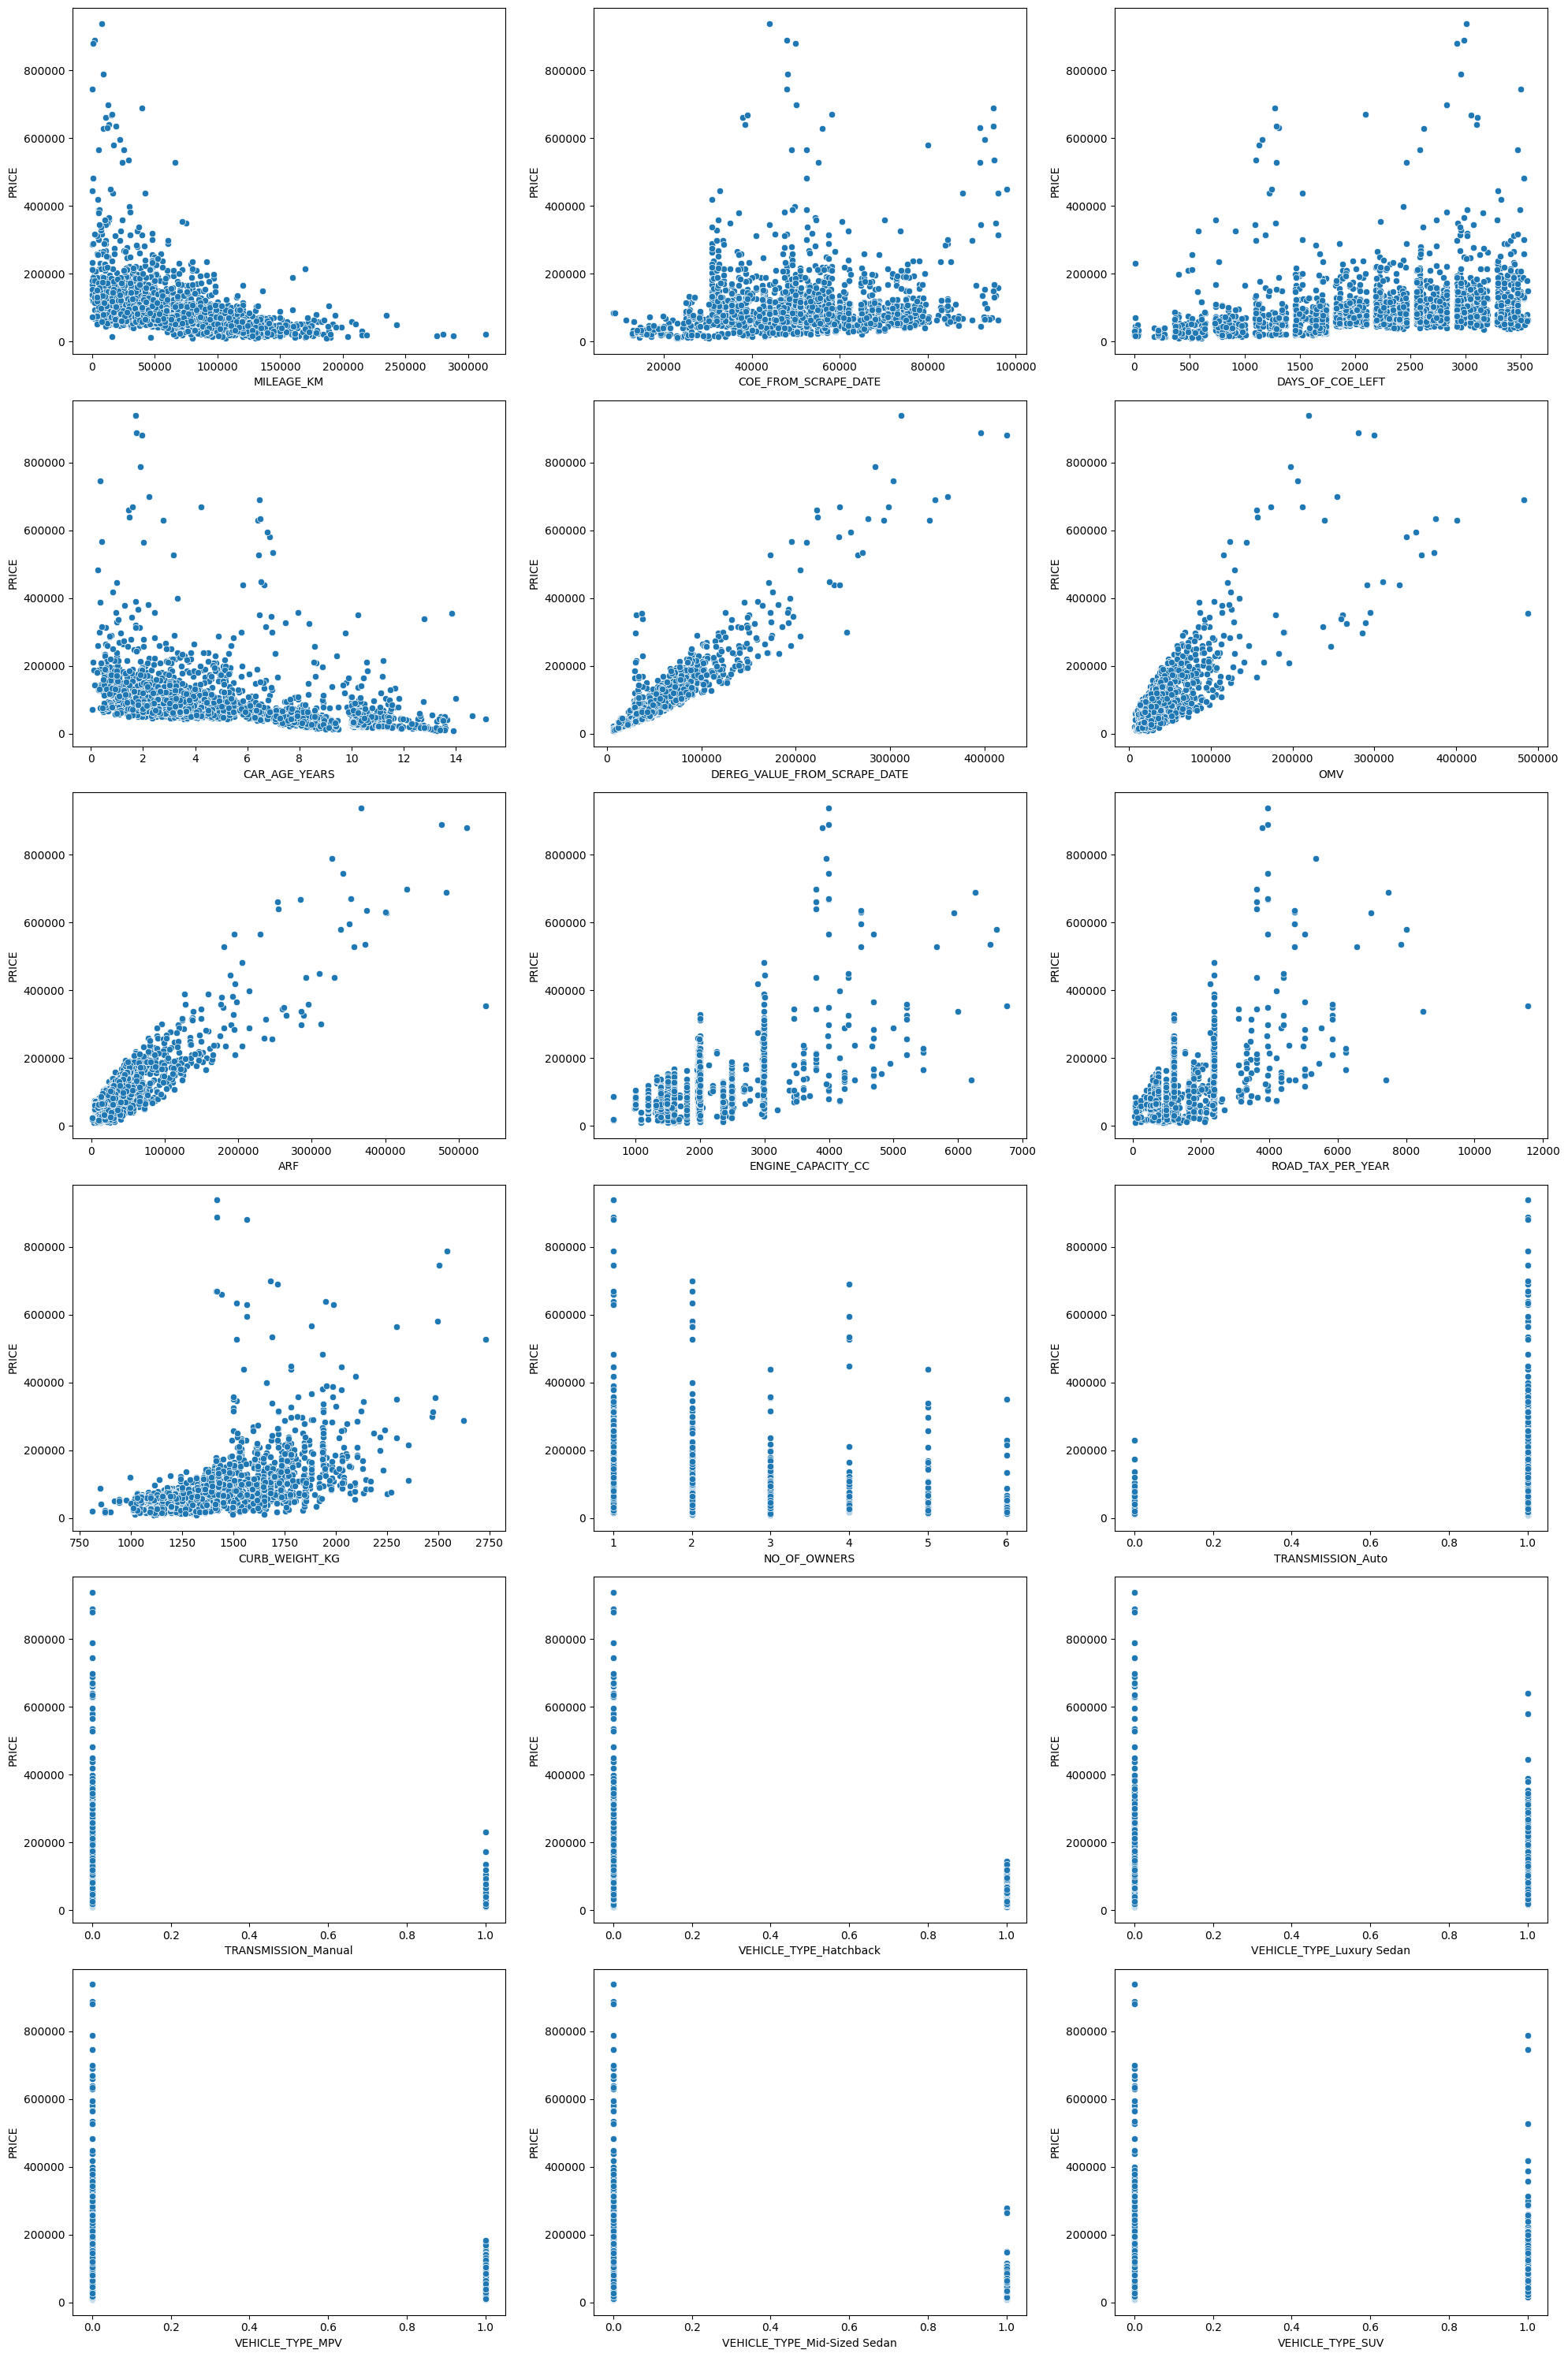

In [24]:
import math

# Retrieve all columns containing numeric data, excluding the first two columns
numeric_columns = features_data.select_dtypes(include='number').columns[2:]

# Calculate the number of rows and columns needed to display all the scatterplots
n_cols = len(numeric_columns) - 2 # Exclude the first two columns ("Unnamed: 0" and "PRICE")
n_rows = math.ceil(n_cols / 3)

# Create subplots with the calculated number of rows and columns
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(20, 5 * n_rows))

# Flatten the array of subplots
axs = axs.flatten()

# Plot scatterplots for each numeric column against "PRICE"
for i in range(n_cols):
    sns.scatterplot(x=features_data[numeric_columns[i]], y=features_data['PRICE'], ax=axs[i])

# Remove empty subplots
for i in range(n_cols, n_rows * 3):
    axs[i].remove()

plt.tight_layout()
plt.show()

(22.5, -0.5)

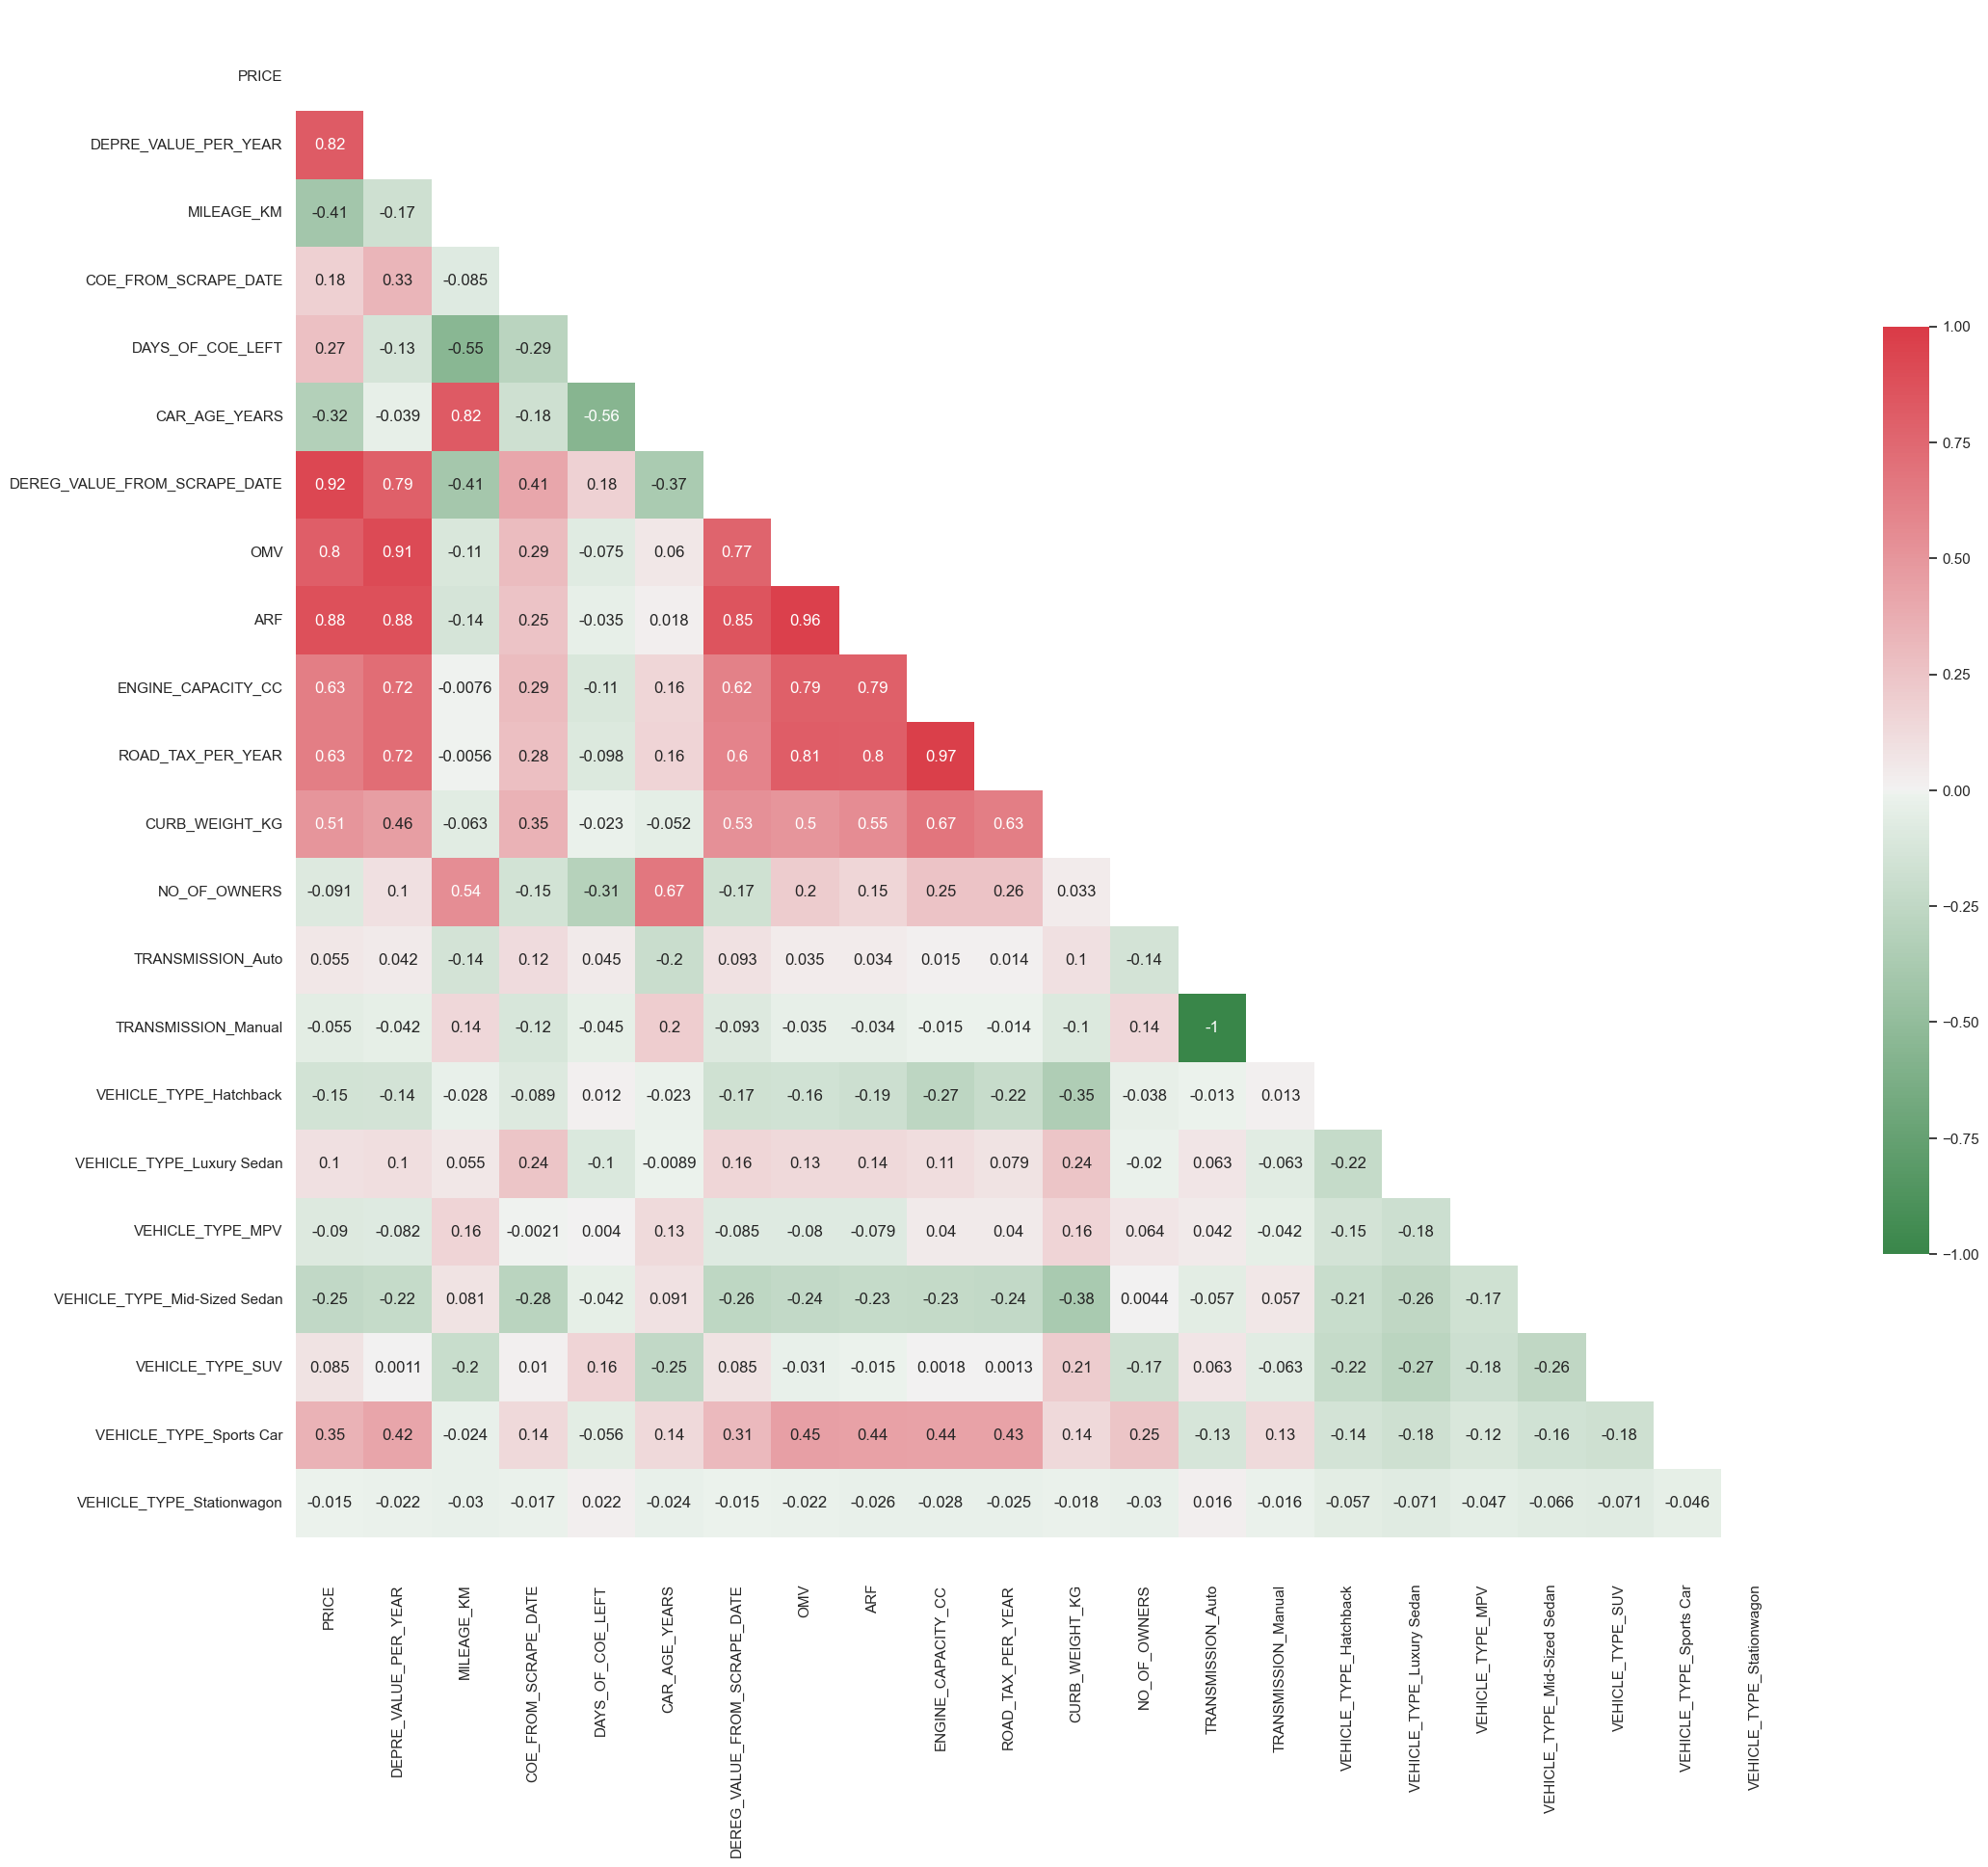

In [25]:
# Corr Matrix Heatmap Visualization

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(features_data.corr(numeric_only=True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(25,25))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(features_data.corr(numeric_only=True), mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax, cbar_kws={"shrink": .5});

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [26]:
# write 5 random rows to a new data file
features_data.sample(n=5).to_csv('deployment_6.csv', index=False)

# get the indices of the 5 rows that were written to the new data file
indices_to_delete = features_data.sample(n=5).index

# delete the same 5 rows from the original data frame
features_data.drop(indices_to_delete, inplace=True)

features_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 3 to 3985
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRICE                         2579 non-null   float64
 1   DEPRE_VALUE_PER_YEAR          2579 non-null   float64
 2   MILEAGE_KM                    2579 non-null   float64
 3   COE_FROM_SCRAPE_DATE          2579 non-null   float64
 4   DAYS_OF_COE_LEFT              2579 non-null   float64
 5   CAR_AGE_YEARS                 2579 non-null   float64
 6   DEREG_VALUE_FROM_SCRAPE_DATE  2579 non-null   float64
 7   OMV                           2579 non-null   float64
 8   ARF                           2579 non-null   float64
 9   ENGINE_CAPACITY_CC            2579 non-null   int64  
 10  ROAD_TAX_PER_YEAR             2579 non-null   float64
 11  CURB_WEIGHT_KG                2579 non-null   float64
 12  NO_OF_OWNERS                  2579 non-null   float64
 13  TRA

In [27]:
print(features_data.columns)

Index(['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE_YEARS', 'DEREG_VALUE_FROM_SCRAPE_DATE',
       'OMV', 'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION_Auto',
       'TRANSMISSION_Manual', 'VEHICLE_TYPE_Hatchback',
       'VEHICLE_TYPE_Luxury Sedan', 'VEHICLE_TYPE_MPV',
       'VEHICLE_TYPE_Mid-Sized Sedan', 'VEHICLE_TYPE_SUV',
       'VEHICLE_TYPE_Sports Car', 'VEHICLE_TYPE_Stationwagon'],
      dtype='object')


In [28]:
# Assign y and X values, remove the price from the features_data so that it will only contains features

y = features_data['PRICE'].values

del features_data['PRICE']

X = features_data.values

In [29]:
print(X.shape)
print(y.shape)

(2579, 21)
(2579,)


# Split and Train the Data 

In [103]:
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Gradient Boosting Model

In [104]:
# Fit regression model
gbr_model = ensemble.GradientBoostingRegressor(
    n_estimators=1000, #how many decision trees to build (boost how many times)
    learning_rate=0.1, #how much decision trees influence overall prediction (not too high ot else may miss the target)
    max_depth=6, #maximum depth of the individual regression estimators. (to avoid overfitting)
    min_samples_leaf=9, #The minimum number of samples required to be at a leaf node.
    max_features=0.1, #10% If float, then max_features is a percentage (max_features * n_features) features are considered at each split. How many features to consider?
    loss='huber',
    random_state=7
)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=6, max_features=0.1,
                          min_samples_leaf=9, n_estimators=1000,
                          random_state=7)

In [105]:
# Evaluate model using R-squared and Adjusted R-squared

from sklearn.metrics import r2_score

n = X_train.shape[0]  # number of observations in training set
p = X_train.shape[1]  # number of features

# Find the R-squared on the training set
y_train_pred = gbr_model.predict(X_train)
r2_gbr = r2_score(y_train, y_train_pred)

# Calculate the adjusted R-squared
adj_r2_gbr = 1 - (1 - r2_gbr) * (n - 1) / (n - p - 1)

print("Training Set R-squared: %.4f" % r2_gbr)
print("Training Set Adjusted R-squared: %.4f" % adj_r2_gbr)

Training Set R-squared: 0.9931
Training Set Adjusted R-squared: 0.9931


In [106]:
n = X_test.shape[0]  # number of observations in testing set
p = X_test.shape[1]  # number of features

# Find the R-squared on the testing set
y_test_pred = gbr_model.predict(X_test)
r2_gbr = r2_score(y_test, y_test_pred)

# Calculate the adjusted R-squared
adj_r2_gbr = 1 - (1 - r2_gbr) * (n - 1) / (n - p - 1)

print("Testing Set R-squared: %.4f" % r2_gbr)
print("Testing Set Adjusted R-squared: %.4f" % adj_r2_gbr)

Testing Set R-squared: 0.9736
Testing Set Adjusted R-squared: 0.9729


In [92]:
# from sklearn import ensemble
# from sklearn.model_selection import HalvingGridSearchCV

# # define the hyperparameters to search
# param_grid = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'min_samples_leaf': [5, 9, 13],
#     'max_features': [0.1, 0.3, 0.5],
#     'loss': ['squared_error', 'absolute_error', 'huber']
# }

# # create the GridSearchCV object
# grid = HalvingGridSearchCV(ensemble.GradientBoostingRegressor(random_state=7), param_grid, cv=5, scoring='neg_root_mean_squared_error')

# # fit the GridSearchCV object to the training data
# grid.fit(X_train, y_train)

# # get the best hyperparameters
# best_params = grid.best_params_

# # create the GradientBoostingRegressor model with the best hyperparameters
# gbr_model = ensemble.GradientBoostingRegressor(random_state=7, **best_params)

# # fit the GradientBoostingRegressor model to the training data
# gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, loss='absolute_error',
                          max_features=0.5, min_samples_leaf=5, random_state=7)

In [93]:
# # Evaluate model using R-squared and Adjusted R-squared

# from sklearn.metrics import r2_score

# n = X_train.shape[0]  # number of observations in training set
# p = X_train.shape[1]  # number of features

# # Find the R-squared on the training set
# y_train_pred = gbr_model.predict(X_train)
# r2_gbr = r2_score(y_train, y_train_pred)

# # Calculate the adjusted R-squared
# adj_r2_gbr = 1 - (1 - r2_gbr) * (n - 1) / (n - p - 1)

# print("Training Set R-squared: %.4f" % r2_gbr)
# print("Training Set Adjusted R-squared: %.4f" % adj_r2_gbr)

Training Set R-squared: 0.9714
Training Set Adjusted R-squared: 0.9711


In [94]:
# n = X_test.shape[0]  # number of observations in testing set
# p = X_test.shape[1]  # number of features

# # Find the R-squared on the testing set
# y_test_pred = gbr_model.predict(X_test)
# r2_gbr = r2_score(y_test, y_test_pred)

# # Calculate the adjusted R-squared
# adj_r2_gbr = 1 - (1 - r2_gbr) * (n - 1) / (n - p - 1)

# print("Testing Set R-squared: %.4f" % r2_gbr)
# print("Testing Set Adjusted R-squared: %.4f" % adj_r2_gbr)

Testing Set R-squared: 0.9480
Testing Set Adjusted R-squared: 0.9466


# Feature Selection

In [34]:
# These are the feature labels from our data set
feature_labels = np.array(['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE_YEARS',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'ENGINE_CAPACITY_CC',
       'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG', 'NO_OF_OWNERS',
       'TRANSMISSION_Auto', 'TRANSMISSION_Manual', 'VEHICLE_TYPE_Hatchback',
       'VEHICLE_TYPE_Luxury Sedan', 'VEHICLE_TYPE_MPV',
       'VEHICLE_TYPE_Mid-Sized Sedan', 'VEHICLE_TYPE_SUV',
       'VEHICLE_TYPE_Sports Car', 'VEHICLE_TYPE_Stationwagon'])

In [35]:
# Create a numpy array based on the model's feature importances
importance = gbr_model.feature_importances_


In [36]:
# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()


In [37]:
# Print each feature label, from least important to most important
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

VEHICLE_TYPE_Sports Car - 0.00%
TRANSMISSION_Auto - 0.09%
NO_OF_OWNERS - 0.09%
VEHICLE_TYPE_Luxury Sedan - 0.12%
TRANSMISSION_Manual - 0.26%
VEHICLE_TYPE_Mid-Sized Sedan - 0.80%
VEHICLE_TYPE_Hatchback - 1.12%
ROAD_TAX_PER_YEAR - 1.99%
VEHICLE_TYPE_MPV - 2.17%
CURB_WEIGHT_KG - 2.74%
ARF - 2.83%
DEPRE_VALUE_PER_YEAR - 4.07%
VEHICLE_TYPE_SUV - 4.42%
DEREG_VALUE_FROM_SCRAPE_DATE - 5.45%
ENGINE_CAPACITY_CC - 5.49%
COE_FROM_SCRAPE_DATE - 7.21%
MILEAGE_KM - 10.66%
DAYS_OF_COE_LEFT - 11.04%
OMV - 11.63%
PRICE - 12.71%
CAR_AGE_YEARS - 15.09%


# Make Predictions

In [107]:
# Provide the data from the deploy.csv to test the model

car_to_value = [11320.0,29717.0,49012.0,2922.0,1.99,69556.0,34564.0,40390.0,1991,1202.0,1644.0,1.0,1,0,0,1,0,0,0,0,0
]
                

In [108]:
# convert the data to an array format

veh_to_value = [car_to_value]

In [109]:
# Run the model and make a prediction for each car in the veh_to_value array
predicted_car_values = gbr_model.predict(veh_to_value)

In [110]:
# Since we are only predicting the price of one car, just look at the first prediction returned
predicted_value = predicted_car_values[0]

print("This car has an estimated value of ${:,.2f}".format(predicted_value))

This car has an estimated value of $110,408.43


In [111]:
# Provide the data from the deploy.csv to test the model

car_to_value2 = [6030.0,116000.0,14664.0,1468.0,10.15,14254.0,12717.0,12717.0,1497,684.0,1095.0,2.0,1,0,0,0,0,1,0,0,0]
                

In [112]:
# convert the data to an array format

veh_to_value2 = [car_to_value2]

In [113]:
# Run the model and make a prediction for each car in the veh_to_value array
predicted_car_values2 = gbr_model.predict(veh_to_value2)

In [114]:
# Since we are only predicting the price of one car, just look at the first prediction returned
predicted_value2 = predicted_car_values2[0]

print("This car has an estimated value of ${:,.2f}".format(predicted_value2))

This car has an estimated value of $29,280.56


# Catboost

In [50]:
# import Catboost Regressor 
# !pip install catboost --upgrade
from catboost import CatBoostRegressor

In [ ]:
#!pip install ipywidgets

In [51]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [52]:
# Set hyperparameters for CatBoost
params = {'loss_function':'RMSE',
          'eval_metric':'R2',
          'verbose':False,
          'random_seed':7
         }

# Fit the model
cbc = CatBoostRegressor(**params)
cbc.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        use_best_model=True,
        plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [80]:
# Evaluate model using R-squared and Adjusted R-squared

from sklearn.metrics import r2_score

n = X_train.shape[0]  # number of observations in training set
p = X_train.shape[1]  # number of features

# Find the R-squared on the training set
y_train_pred = cbc.predict(X_train)
r2_cbc = r2_score(y_train, y_train_pred)

# Calculate the adjusted R-squared
adj_r2_cbc = 1 - (1 - r2_cbc) * (n - 1) / (n - p - 1)

print("Training Set R-squared: %.4f" % r2_cbc)
print("Training Set Adjusted R-squared: %.4f" % adj_r2_cbc)

Training Set R-squared: 0.9998
Training Set Adjusted R-squared: 0.9998


In [81]:
n = X_test.shape[0]  # number of observations in testing set
p = X_test.shape[1]  # number of features

# Find the R-squared on the testing set
y_test_pred = cbc.predict(X_test)
r2_cbc = r2_score(y_test, y_test_pred)

# Calculate the adjusted R-squared
adj_r2_cbc = 1 - (1 - r2_cbc) * (n - 1) / (n - p - 1)

print("Testing Set R-squared: %.4f" % r2_cbc)
print("Testing Set Adjusted R-squared: %.4f" % adj_r2_cbc)

Testing Set R-squared: 0.9868
Testing Set Adjusted R-squared: 0.9864


In [85]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
}

# create the GridSearchCV object
grid = GridSearchCV(CatBoostRegressor(loss_function='RMSE', eval_metric='R2', verbose=False, random_seed=7), param_grid, cv=5, scoring='neg_root_mean_squared_error')

# fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid.best_params_

# create the CatBoost model with the best hyperparameters
cbc = CatBoostRegressor(loss_function='RMSE', eval_metric='R2', verbose=False, random_seed=7, **best_params)

# fit the CatBoost model to the training data
cbc.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        use_best_model=True,
        plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [86]:
from sklearn.metrics import r2_score

n = X_train.shape[0]  # number of observations in training set
p = X_train.shape[1]  # number of features

# Find the R-squared on the training set
y_train_pred = cbc.predict(X_train)
r2_cbc = r2_score(y_train, y_train_pred)

# Calculate the adjusted R-squared
adj_r2_cbc = 1 - (1 - r2_cbc) * (n - 1) / (n - p - 1)

print("Training Set R-squared: %.4f" % r2_cbc)
print("Training Set Adjusted R-squared: %.4f" % adj_r2_cbc)

Training Set R-squared: 0.9983
Training Set Adjusted R-squared: 0.9983


In [87]:
n = X_test.shape[0]  # number of observations in testing set
p = X_test.shape[1]  # number of features

# Find the R-squared on the testing set
y_test_pred = cbc.predict(X_test)
r2_cbc = r2_score(y_test, y_test_pred)

# Calculate the adjusted R-squared
adj_r2_cbc = 1 - (1 - r2_cbc) * (n - 1) / (n - p - 1)

print("Testing Set R-squared: %.4f" % r2_cbc)
print("Testing Set Adjusted R-squared: %.4f" % adj_r2_cbc)

Testing Set R-squared: 0.9843
Testing Set Adjusted R-squared: 0.9838


# Make Prediction - CatBoost

In [55]:
# Run the model and make a prediction for each car in the veh_to_value array
predicted_car_values_cbc = cbc.predict(veh_to_value)

In [56]:
# Since we are only predicting the price of one car, just look at the first prediction returned
predicted_value_cbc = predicted_car_values_cbc[0]

print("This car has an estimated value of ${:,.2f}".format(predicted_value_cbc))

This car has an estimated value of $112,228.27


In [57]:
# Run the model and make a prediction for each car in the veh_to_value array
predicted_car_values2_cbc = cbc.predict(veh_to_value2)

In [58]:
# Since we are only predicting the price of one car, just look at the first prediction returned
predicted_value2_cbc = predicted_car_values2_cbc[0]

print("This car has an estimated value of ${:,.2f}".format(predicted_value2_cbc))

This car has an estimated value of $28,858.68


# LightGBM

In [59]:
import lightgbm as lgb

In [67]:
# Set hyperparameters for LightGBM
params = {'objective': 'regression',
          'metric': 'rmse',
          'random_state': 7
         }

# Define the callbacks
callbacks = [lgb.early_stopping(100), lgb.log_evaluation(period=100)]

# Fit the model
lgbm = lgb.LGBMRegressor(**params)
lgbm.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         callbacks=callbacks
        )

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 15376.5
Did not meet early stopping. Best iteration is:
[99]	valid_0's rmse: 15375.4


LGBMRegressor(metric='rmse', objective='regression', random_state=7)

In [82]:
from sklearn.metrics import r2_score

n = X_train.shape[0]  # number of observations in training set
p = X_train.shape[1]  # number of features

# Find the R-squared on the training set
y_train_pred = lgbm.predict(X_train)
r2_lgbm = r2_score(y_train, y_train_pred)

# Calculate the adjusted R-squared
adj_r2_lgbm = 1 - (1 - r2_lgbm) * (n - 1) / (n - p - 1)

print("Training Set R-squared: %.4f" % r2_lgbm)
print("Training Set Adjusted R-squared: %.4f" % adj_r2_lgbm)

Training Set R-squared: 0.9737
Training Set Adjusted R-squared: 0.9734


In [83]:
n = X_test.shape[0]  # number of observations in testing set
p = X_test.shape[1]  # number of features

# Find the R-squared on the testing set
y_test_pred = lgbm.predict(X_test)
r2_lgbm = r2_score(y_test, y_test_pred)

# Calculate the adjusted R-squared
adj_r2_lgbm = 1 - (1 - r2_lgbm) * (n - 1) / (n - p - 1)

print("Testing Set R-squared: %.4f" % r2_lgbm)
print("Testing Set Adjusted R-squared: %.4f" % adj_r2_lgbm)

Testing Set R-squared: 0.9635
Testing Set Adjusted R-squared: 0.9624


# Make Prediction - LightGBM

In [63]:
# Run the model and make a prediction for each car in the veh_to_value array
predicted_car_values_lgbm = lgbm.predict(veh_to_value)

In [64]:
# Since we are only predicting the price of one car, just look at the first prediction returned
predicted_value_lgbm = predicted_car_values_lgbm[0]

print("This car has an estimated value of ${:,.2f}".format(predicted_value_lgbm))

This car has an estimated value of $112,416.38


In [65]:
# Run the model and make a prediction for each car in the veh_to_value array
predicted_car_values2_lgbm = lgbm.predict(veh_to_value2)

In [66]:
# Since we are only predicting the price of one car, just look at the first prediction returned
predicted_value2_lgbm = predicted_car_values2_lgbm[0]

print("This car has an estimated value of ${:,.2f}".format(predicted_value2_lgbm))

This car has an estimated value of $28,531.26


Summary of R-Squared and Adjusted R-Squared for 3 algorithm

In [84]:
print("Training Set R-squared: %.4f" % r2_gbr)
print("Training Set R-squared: %.4f" % r2_cbc)
print("Training Set R-squared: %.4f" % r2_lgbm)

print("Training Set Adjusted R-squared: %.4f" % adj_r2_gbr)
print("Training Set Adjusted R-squared: %.4f" % adj_r2_cbc)
print("Training Set Adjusted R-squared: %.4f" % adj_r2_lgbm)

print("Testing Set R-squared: %.4f" % r2_gbr)
print("Testing Set R-squared: %.4f" % r2_cbc)
print("Testing Set R-squared: %.4f" % r2_lgbm)

print("Testing Set Adjusted R-squared: %.4f" % adj_r2_gbr)
print("Testing Set Adjusted R-squared: %.4f" % adj_r2_cbc)
print("Testing Set Adjusted R-squared: %.4f" % adj_r2_lgbm)

Training Set R-squared: 0.9931
Training Set R-squared: 0.9868
Training Set R-squared: 0.9635
Training Set Adjusted R-squared: 0.9931
Training Set Adjusted R-squared: 0.9864
Training Set Adjusted R-squared: 0.9624
Testing Set R-squared: 0.9931
Testing Set R-squared: 0.9868
Testing Set R-squared: 0.9635
Testing Set Adjusted R-squared: 0.9931
Testing Set Adjusted R-squared: 0.9864
Testing Set Adjusted R-squared: 0.9624


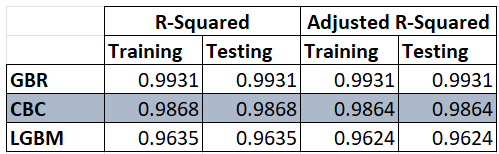

Based on the 3 algorithm, GBR gives the best prediction.

# Saving the model

In [115]:
import pickle

In [117]:
with open('sg_used_car_model_gbr.pkl', 'wb') as f:
    pickle.dump(gbr_model, f)

In [118]:
print(pickle.format_version)

4.0
